In [2]:
import pandas as pd

/var/folders/z1/zt4b5v_n0yb49qxq46y1gp080000gn/T/ipykernel_13125/4080736814.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
transactions = pd.read_csv('../retail/transactions.csv', parse_dates=['date'])
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: >

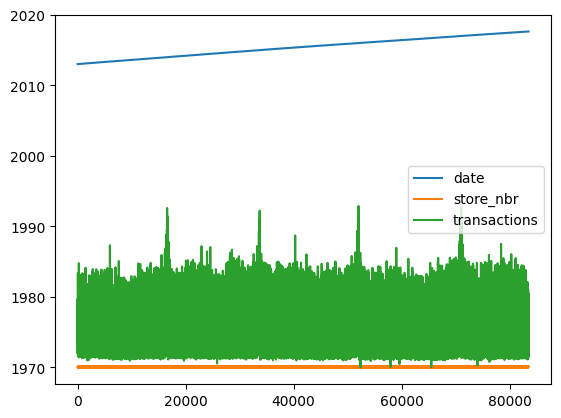

In [4]:
transactions.plot()

<Axes: xlabel='date'>

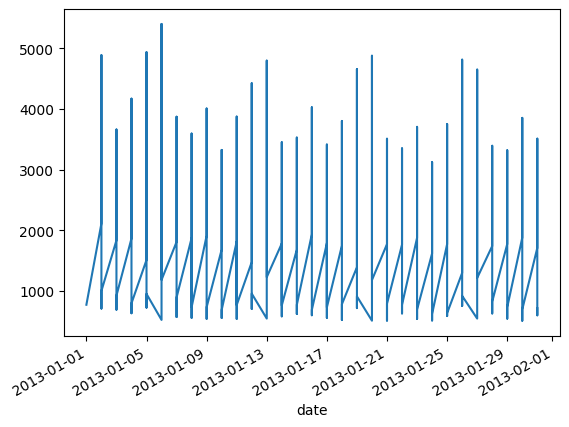

In [5]:
transactions.set_index('date').loc['2013-01', 'transactions'].plot()

<Axes: xlabel='date'>

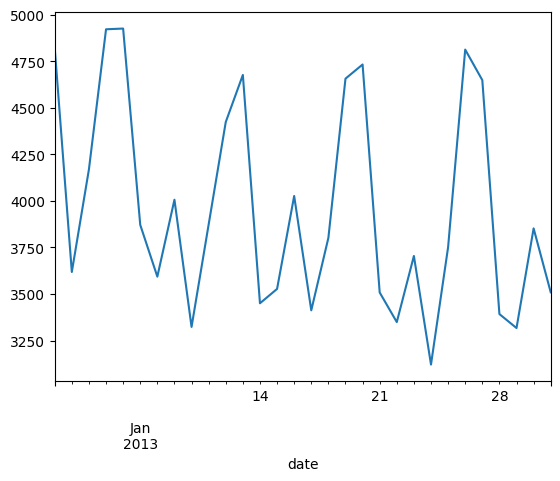

In [6]:
(transactions
    .query('store_nbr == 44')
    .set_index('date').loc['2013-01', 'transactions']
    .plot()
)

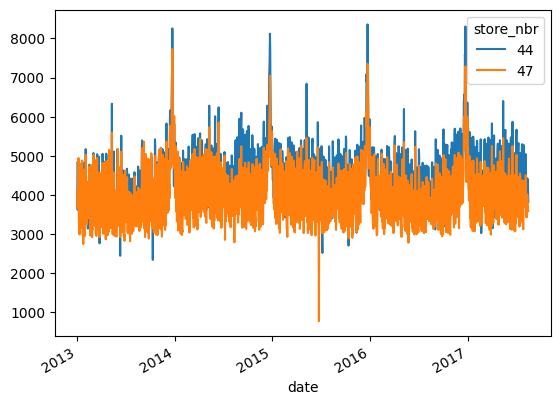

In [7]:
(
    transactions
    .query('store_nbr in [44, 47]')
    .pivot_table(index='date', columns='store_nbr')
                 # , values='transactions' , aggfunc='sum')
    .droplevel(0, axis=1)
).plot();

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [8]:
oil = pd.read_csv('../retail/oil.csv', parse_dates=['date'])
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: xlabel='date'>

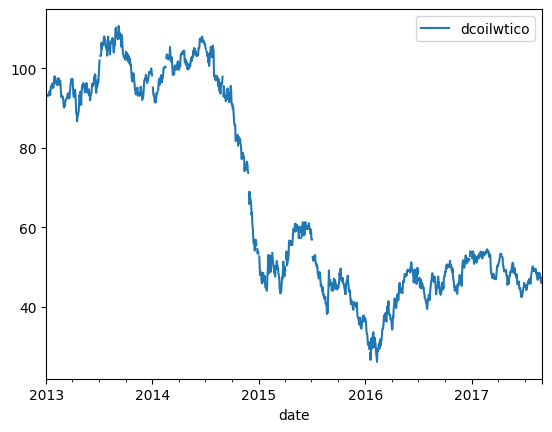

In [9]:
# Using set index
(oil
 .set_index("date")
 .plot()
)

<Axes: xlabel='date'>

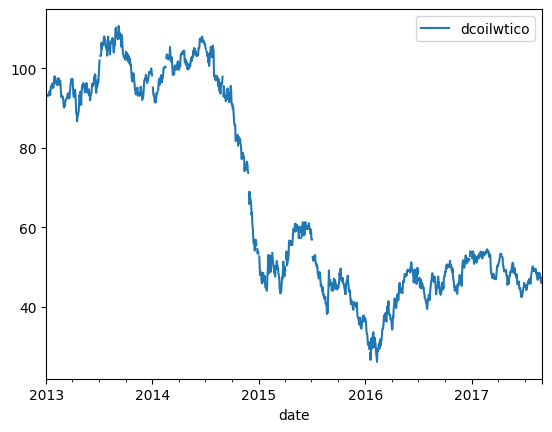

In [10]:
# Using x= argument
oil.plot(x='date')

### Observe que usando o SET_INDEX ao invés de X=date
### podemos usar o .loc para filtrar antes do .plot

<Axes: xlabel='date'>

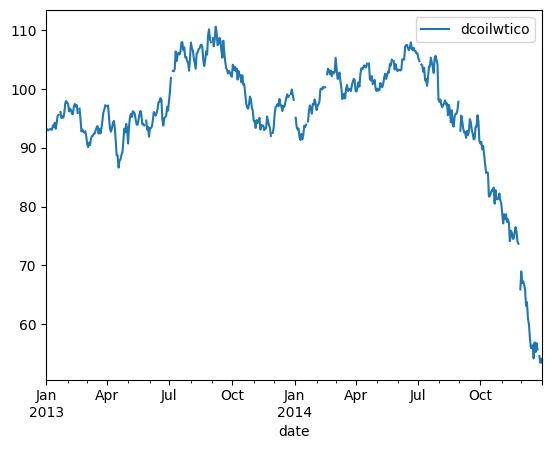

In [11]:
# Example with oil price as datetime instead of object -- more later!
(oil 
 .set_index("date")
 .loc["2013":"2014"]  # nice filtering here with dates
 .plot()
)

### CHART TITLES

In [12]:
transactions_44 = transactions.loc[transactions.store_nbr == 44, ['date', 'transactions']]
transactions_44.head()

,date,transactions
38,2013-01-02,4821
84,2013-01-03,3618
130,2013-01-04,4169
176,2013-01-05,4921
222,2013-01-06,4925


<Axes: title={'center': 'Transactions at Store 44'}, xlabel='Date', ylabel='Number of Transactions'>

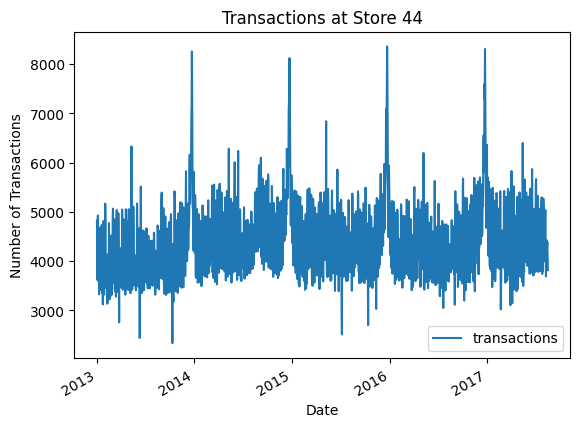

In [13]:
transactions_44.set_index('date').plot(
    title='Transactions at Store 44',
    ylabel='Number of Transactions',
    xlabel='Date'

)


### SERIES COLORS

- Chart styles
- line stylkes
- chart colours

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [14]:
# !pip install seaborn

In [15]:
import seaborn as sns
sns.set_style("darkgrid")

In [16]:
oil.dtypes

date          datetime64[ns]
dcoilwtico           float64
dtype: object

In [17]:
oil = oil.rename(columns={"dcoilwtico": "Oil Price"})
oil.head()

,date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: title={'center': 'Oil Price 2013-2017'}, xlabel='Date', ylabel='USD Price'>

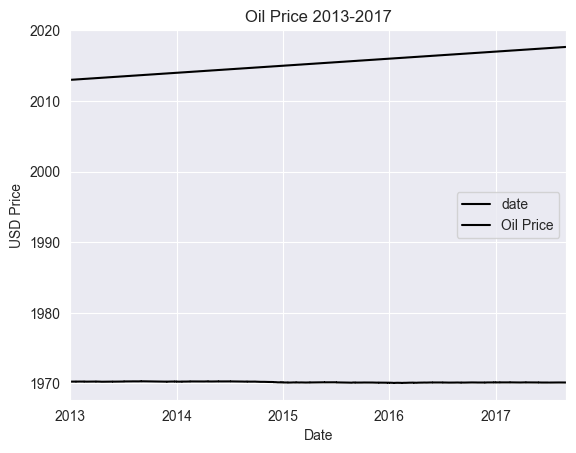

In [18]:
(oil
 .set_index(oil["date"]) #.astype("Datetime64"))
 .plot(
    title="Oil Price 2013-2017", 
    xlabel="Date", 
    ylabel="USD Price", 
    c="Black")
)

### Subplots e figsize

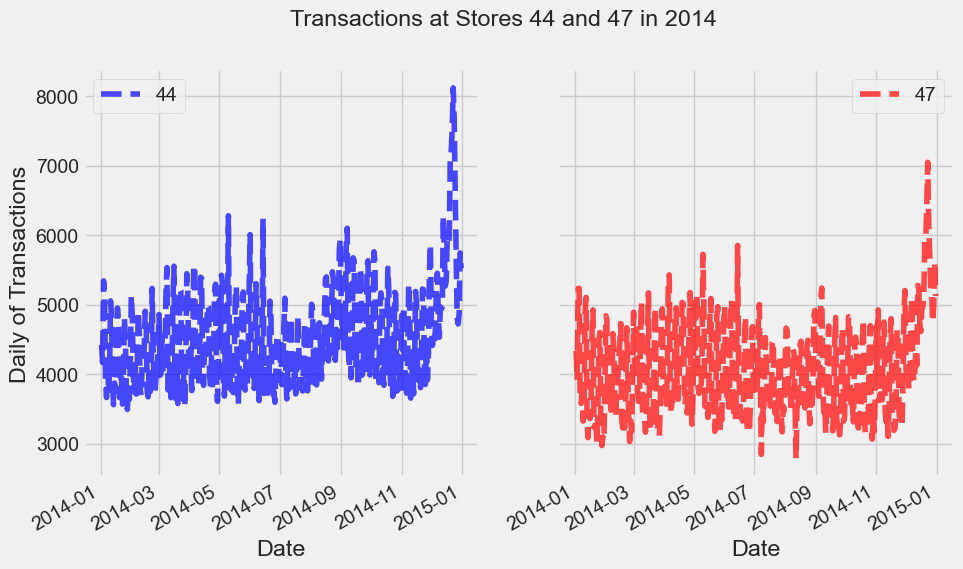

In [19]:
import matplotlib
matplotlib.style.use('fivethirtyeight')

(
    transactions
    .query('store_nbr in [44, 47] and date.dt.year == 2014')
    .pivot(index='date', columns='store_nbr') #, values='transactions')
    .droplevel(0, axis=1)
    .plot(
        figsize=(10, 6),
        layout=(1, 2),
        title='Transactions at Stores 44 and 47 in 2014',
        xlabel='Date',
        ylabel='Daily of Transactions',
        color=['Blue', 'Red'],
        alpha=0.7,
        subplots=True,
        sharey=True,
        style=['--', '--']
    )
);

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 plot of transactions by store, with one plot for each store.

Thanks!

In [20]:
transactions = pd.read_csv("../retail/transactions.csv")

stores_1234 = (transactions
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]  #filter to stores 1, 2, 3, 4
                .pivot_table(index="date", columns="store_nbr") # Createa pivot table
                .droplevel(0, axis=1))  # drop outer layer of column axis
stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


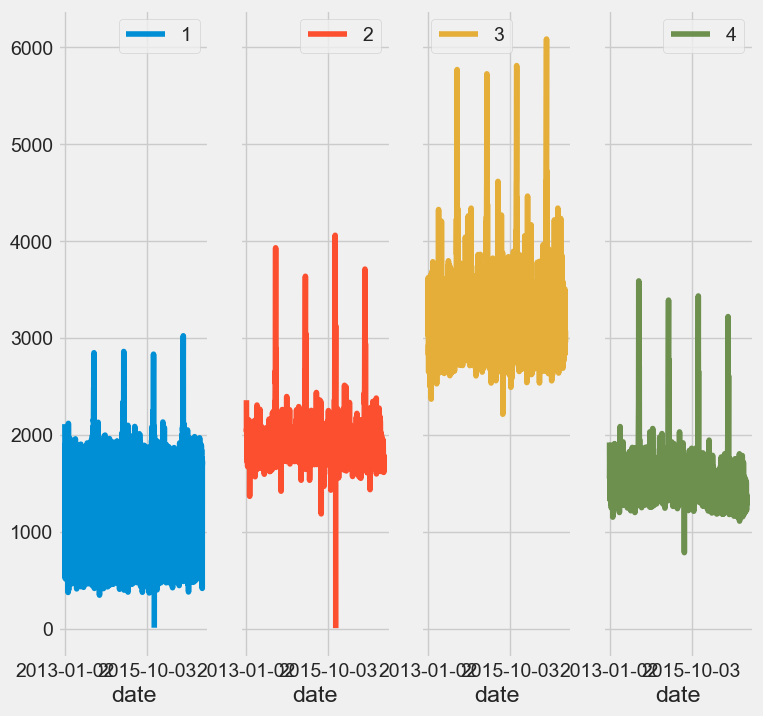

In [21]:
stores_1234.plot(subplots=True,   # create subplots
                 layout=(1, 4),   # in a 2x2 layour
                 figsize=(8, 8),  # increase figure size
                 sharey=True);     # share y-axis among plots for better comparison

### Barcharts

In [22]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


<Axes: xlabel='store_nbr'>

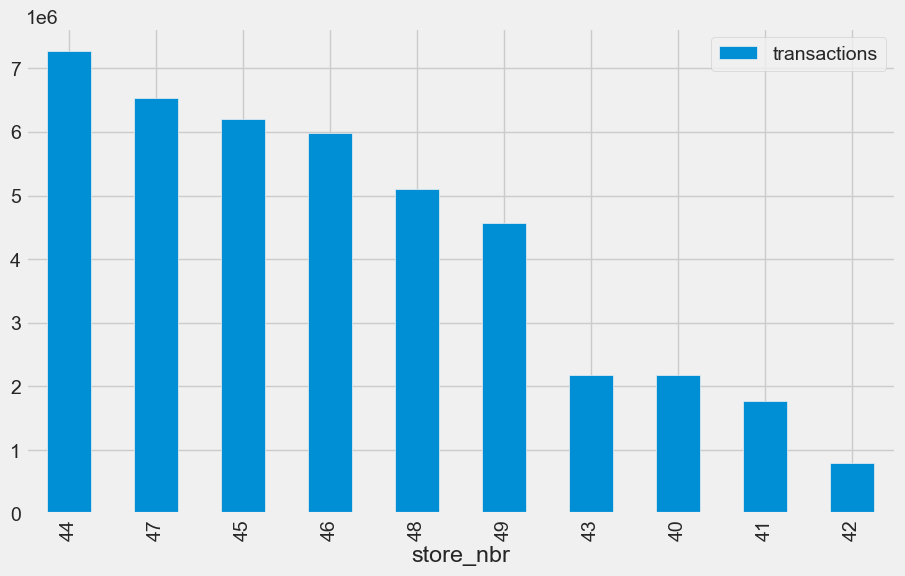

In [23]:
store_40s = list(range(40,50))

(
    transactions
    .query('store_nbr in @store_40s')
    .groupby(['store_nbr']).agg({'transactions': 'sum'})
    .sort_values(by='transactions', ascending=False)
    .plot.bar(
    figsize=(10, 6),
    )
)

### Grouped and Stacked BAR Chart

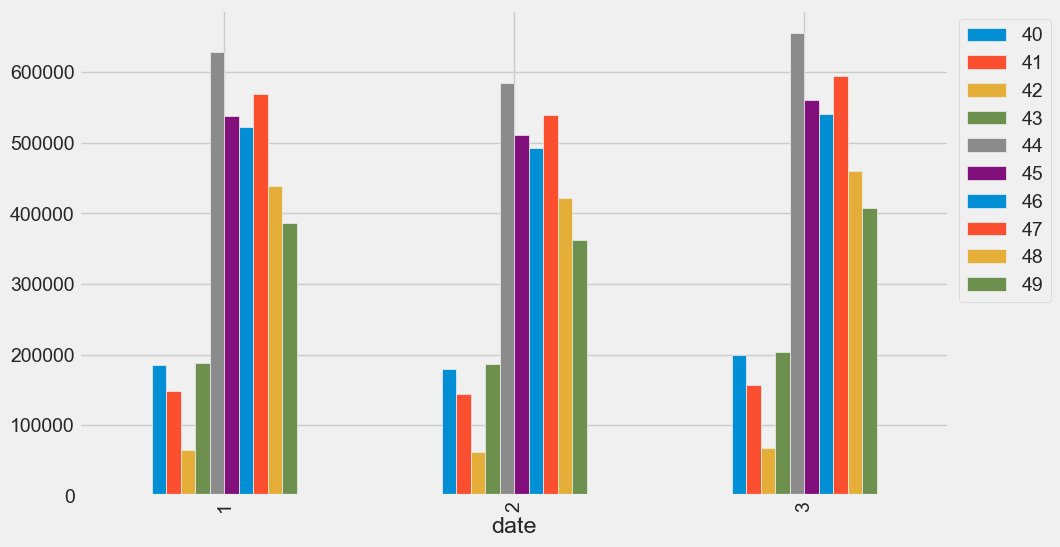

In [24]:
# Certifique-se de que 'store_40s' está definido e 'date' é datetime
store_40s = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]  # Exemplo
transactions['date'] = pd.to_datetime(transactions['date'])

(
    transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions['date'].dt.month, 
                 columns='store_nbr', values='transactions',
                 aggfunc='sum')    
    .plot.bar(        
        figsize=(10, 6),    
        # stacked=True
    ).legend(bbox_to_anchor=(1, 1))
);

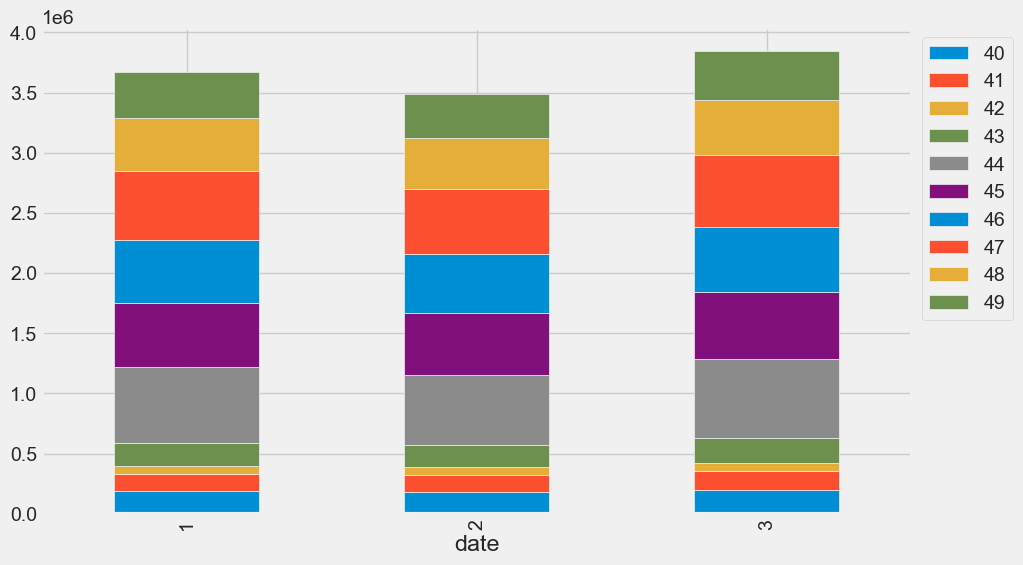

In [25]:
# Certifique-se de que 'store_40s' está definido e 'date' é datetime
store_40s = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]  # Exemplo
transactions['date'] = pd.to_datetime(transactions['date'])

(
    transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions['date'].dt.month, 
                 columns='store_nbr', values='transactions',
                 aggfunc='sum')    
    .plot.bar(        
        figsize=(10, 6),    
        stacked=True
    ).legend(bbox_to_anchor=(1, 1))
);

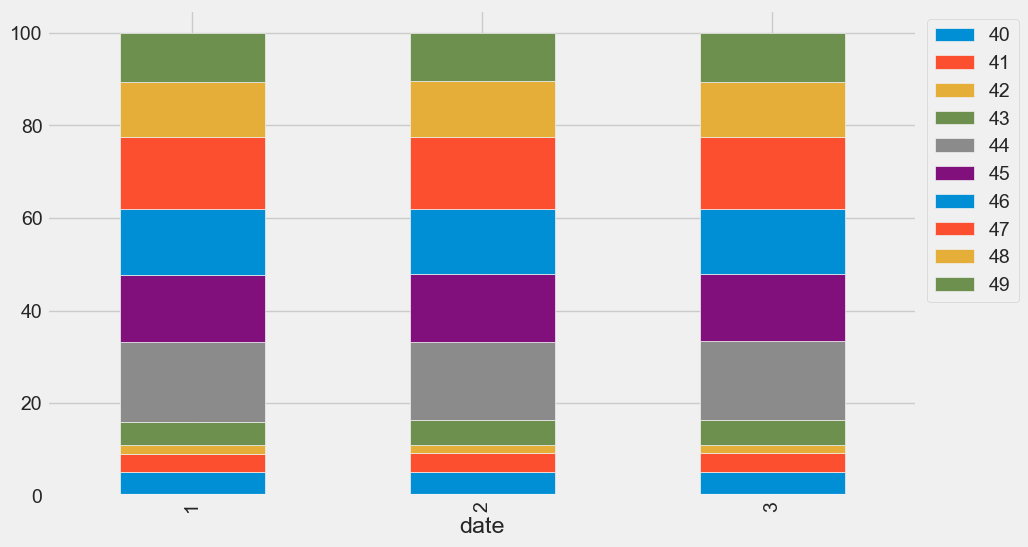

In [26]:
# Certifique-se de que 'store_40s' está definido e 'date' é datetime
store_40s = [40, 41, 42, 43, 44, 45, 46, 47, 48, 49]  # Exemplo
transactions['date'] = pd.to_datetime(transactions['date'])

(
    transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .pivot_table(index=transactions['date'].dt.month, 
                 columns='store_nbr', values='transactions',
                 aggfunc='sum').apply(lambda x : x * 100 / sum(x), axis=1)
    .plot.bar(        
        figsize=(10, 6),    
        stacked=True
    ).legend(bbox_to_anchor=(1, 1))
);

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [27]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


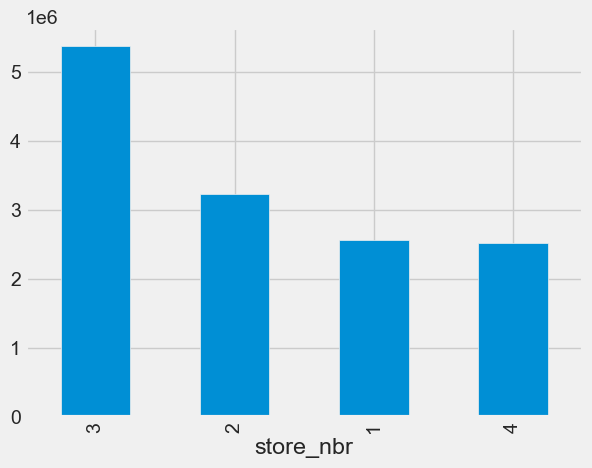

In [28]:
# create bar chart of total sales for each series, sorted high to low

stores_1234.sum().sort_values(ascending=False).plot.bar();

In [29]:
# Calculate monthly sum for each store groupbed by month

# stores_1234.index.month will allow you to groupby the month!

stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


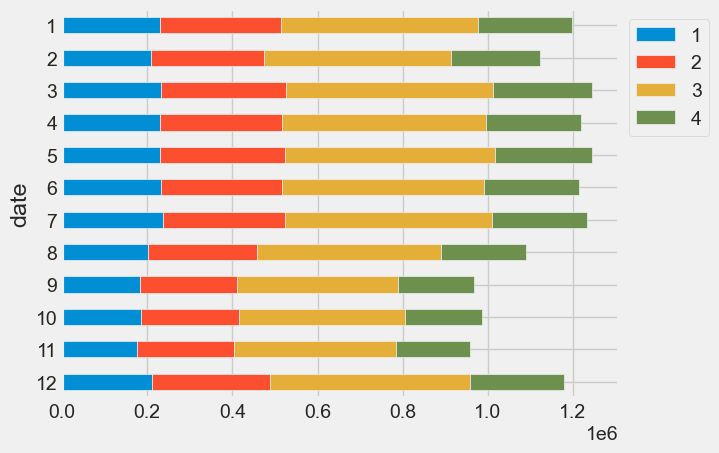

In [30]:
(stores_1234_monthly
 .sort_index(ascending=False)    # sort in ascending order so lowest comes first (technically this code is redundant)
 .plot.barh(stacked=True)        # created stacked bar chart (will stack by column names)
 .legend(bbox_to_anchor=(1, 1))  # Move legend to better location
)

### Scatterplot

In [32]:
transactions.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [38]:
transactions_scatter = ( transactions
    .query('store_nbr in @store_40s and date.dt.month in [1, 2, 3]')
    .groupby([transactions['store_nbr']])
    .agg({'transactions': 'sum'})            
)
transactions_scatter

,transactions
store_nbr,
40,564515
41,448122
42,194871
43,579435
44,1868114
45,1610965
46,1556157
47,1702525
48,1321544


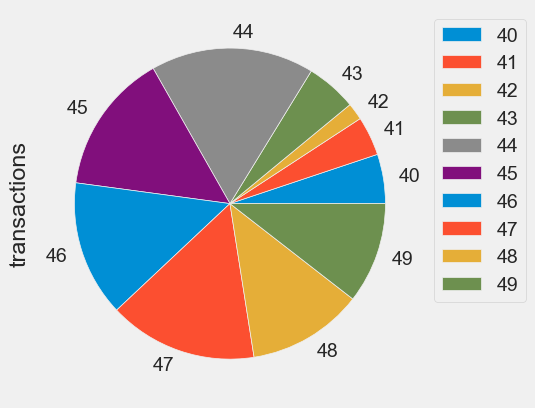

In [41]:
(transactions_scatter
    .plot.pie(
        y='transactions').legend(bbox_to_anchor=(1, 1))
)

In [47]:
( transactions
    .query('store_nbr in @store_40s',)
    .pivot_table(index=transactions['date'].dt.month,
                    columns='store_nbr', values='transactions',
                    aggfunc='sum')           
)

store_nbr,40,41,42,43,44,45,46,47,48,49
date,,,,,,,,,,
1,185490,148431,64758,188657,628438,538370,522763,568824,439045,386589
2,179215,143437,62400,186951,584046,511411,493100,539453,422158,362406
3,199810,156254,67713,203827,655630,561184,540294,594248,460341,407071
4,194785,152869,66870,195502,637139,549474,535584,586216,454378,402373
5,208281,166079,69883,202376,671126,570956,554270,597380,469508,421413
6,196988,155688,67692,190156,631016,541302,516034,562559,436015,401579
7,203107,161205,70549,201074,645571,563700,531886,577574,454707,407053
8,182747,146306,63371,182532,596279,514143,485675,524983,419362,365448
9,151905,119653,64763,146055,516233,422178,412455,455021,353820,317871


<Axes: xlabel='44', ylabel='45'>

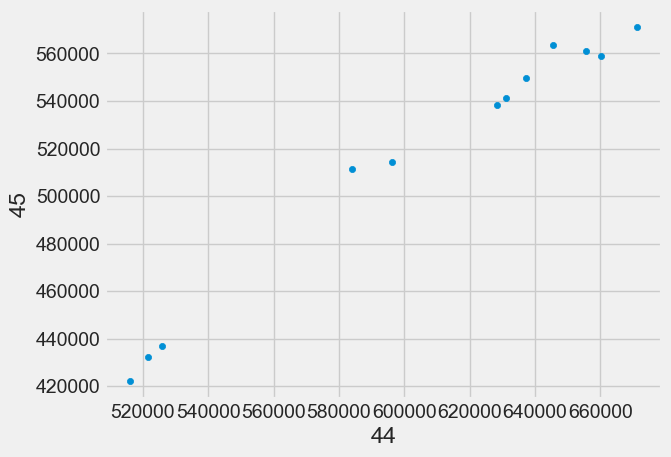

In [48]:
( transactions
    .query('store_nbr in @store_40s',)
    .pivot_table(index=transactions['date'].dt.month,
                    columns='store_nbr', values='transactions',
                    aggfunc='sum')           
).plot.scatter(
    x=44, y=45
)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [49]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='3', ylabel='2'>

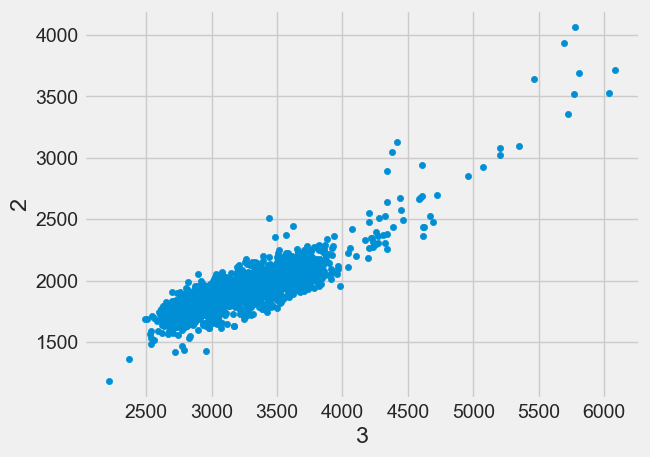

In [50]:
stores_1234.plot.scatter(x=3, y=2) # you could have flipped x and y, not a problem

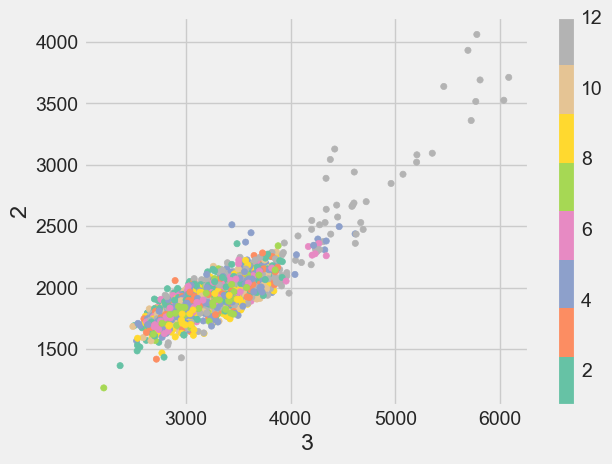

In [51]:
stores_1234.plot.scatter(x=3, 
                         y=2, 
                         c=stores_1234.index.month,  # color by month
                         colormap="Set2");           # specify colormap "Set2", choose your own!

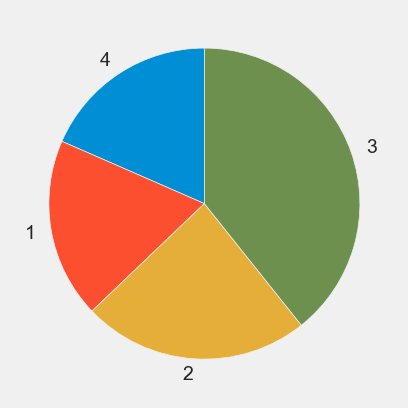

In [53]:
# Example pie chart for reference

(stores_1234
 .sum()                        # sums of stores
 .sort_values(ascending=True)  # Sort from low to high
 .plot 
 .pie(startangle=90)           # start first slice at 12 o'clock
);

### Histograms

<Axes: ylabel='Frequency'>

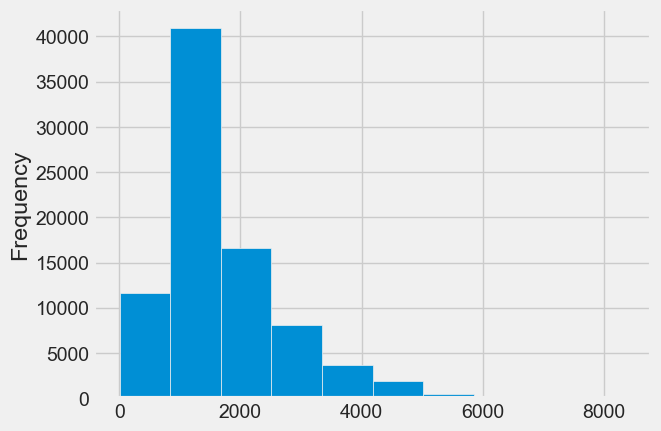

In [55]:
transactions.loc[:, 'transactions'].plot.hist()

<Axes: ylabel='Frequency'>

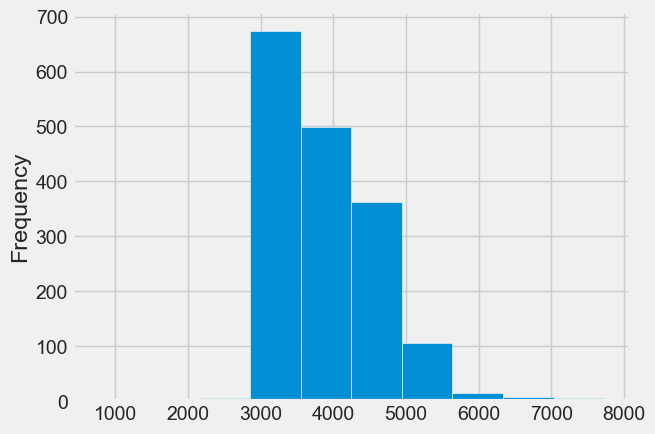

In [57]:
transactions.loc[transactions['store_nbr'] == 47, 'transactions'].plot.hist()

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [59]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

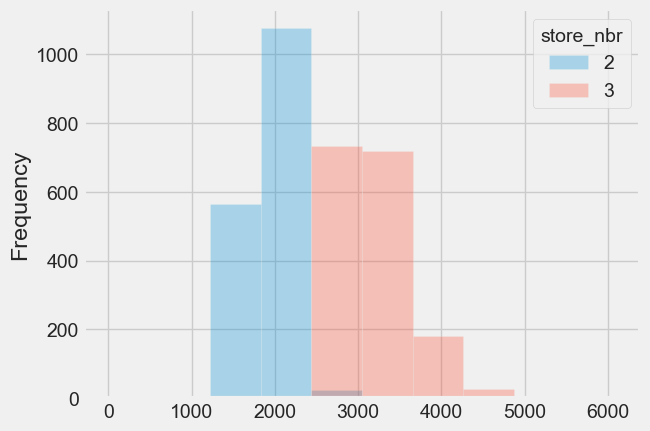

In [60]:
# grab columns for stores 2 and 3, plot a histogram with transparency specified by alpha
stores_1234.loc[:, [2, 3]].plot.hist(alpha=.3)

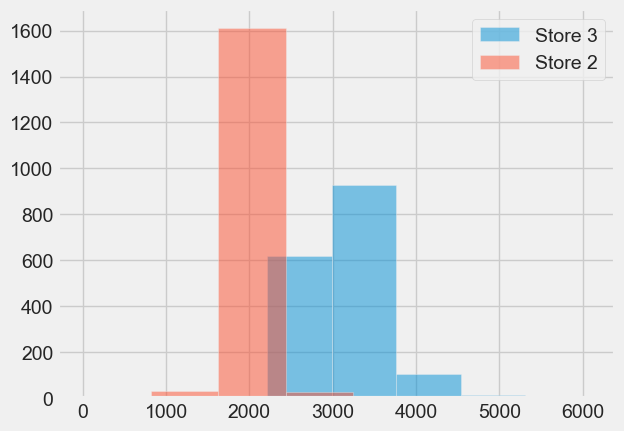

In [65]:
import matplotlib.pyplot as plt

# Filtrar o DataFrame
store_2 = transactions.loc[transactions['store_nbr'] == 2, 'transactions']
store_3 = transactions.loc[transactions['store_nbr'] == 3, 'transactions']

# Criar os histogramas
plt.hist(store_3, bins=5, alpha=0.5, label='Store 3')
plt.hist(store_2, bins=5, alpha=0.5, label='Store 2')

# Adicionar uma legenda
plt.legend(loc='upper right')

# Mostrar o gráfico
plt.show()